In [1]:
import pandas as pd
grains = pd.read_csv('seeds-width-vs-length.csv', header = None)
grains_full = pd.read_csv('seeds.csv', header = None)
samples = grains_full.loc[:, 0:6].values.reshape(210, 7)
varieties = grains_full.loc[:, 7].values

## DECORRELATE DATA

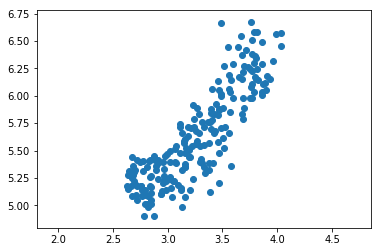

In [3]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains.loc[:,0]

# Assign the 1st column of grains: length
length = grains.loc[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [4]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

0.8604149377143467


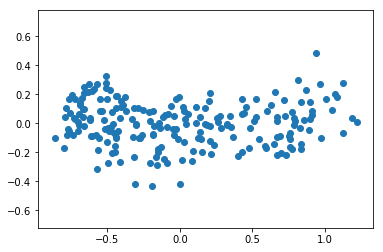

In [5]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [6]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)


7.474656899453042e-17


## PC1

The first principal component of the data is the direction in which the data varies the most.


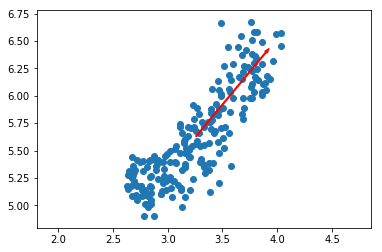

In [11]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.loc[:,0], grains.loc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

## VARIANCE OF PCA FEATURES

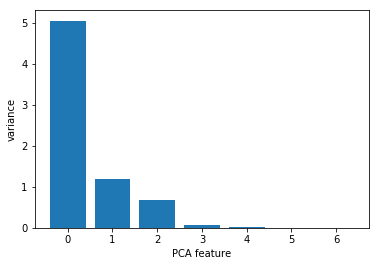

In [12]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## DIMENSION REDUCTION WITH PCA

In [13]:
# Import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
scaled_samples = StandardScaler().fit_transform(samples)
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(210, 2)


=> from 7 features to 2 features

## TF-IDF WORD-FREQUENCY ARRAY

-  some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information
- => idf penalize the high frequency of words

In [14]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


In [15]:
# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


## CLUSTERING WIKIPEDIA

In [17]:
wiki = pd.read_csv('wiki.csv', header = None)
documents = wiki.loc[:,1].tolist()
articles = tfidf.fit_transform(documents)
titles = wiki.loc[:,1]

In [19]:
wiki.head()

,0,1
0,wikipedia-23885690,Research Design and Standards Organization T...
1,wikipedia-23885928,The Death of Bunny Munro The Death of Bunny ...
2,wikipedia-23886057,Management of prostate cancer Treatment for ...
3,wikipedia-23886425,Cheetah reintroduction in India Reintroducti...
4,wikipedia-23886491,Langtang National Park The Langtang National...


In [18]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
# sklearn PCA not support csr_matrix
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

        label                                            article
151014      0   Arn Anderson  Martin Anthony Lunde (born Sept...
389387      0   Usman Khawaja  Usman Khawaja (; born 18 Decem...
138542      0   Neil Fitzmaurice  Neil Fitzmaurice (born 20 A...
138533      0   Ferdynand Antoni Ossendowski  Antoni Ferdynan...
389394      0   Tim Cain  Timothy Cain is a game producer bes...
138530      0   Lawrence O'Donnell  Lawrence Francis O'Donnel...
389395      0   Phil Kearns  Philip Nicholas Kearns (born 27 ...
389396      0   John William Atkinson  John William Atkinson ...
389400      0   Hong Gildong  Hong Gil dong is a fictitious c...
138518      0   Kumbhakarna  Kumbhakarna IAST: "", is a raksh...
138517      0   Jess McMahon  Roderick James "Jess" McMahon (...
138513      0   Robert Walter Weir  Robert Walter Weir (June ...
389403      0   Frank Converse  Frank Converse (born May 22, ...
138509      0   Alex Miller  Alex Miller (born 4 July 1949) i...
389405      0   Bill Bufo

## PCA DOES NOT LEARN PART OF THINGS => USE NMF

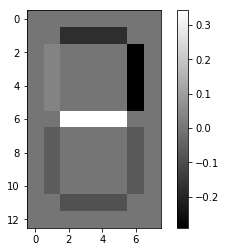

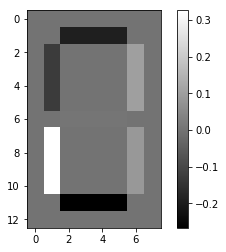

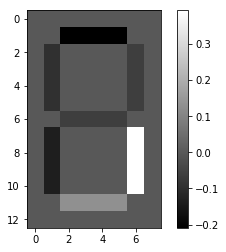

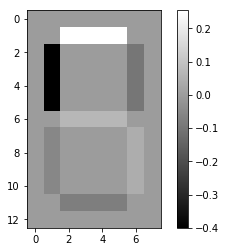

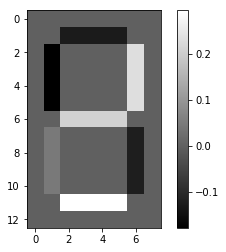

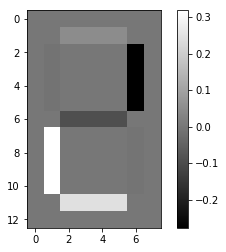

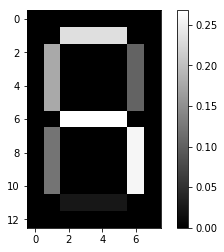

In [20]:
# Read lcd data
samples = pd.read_csv('lcd-digits.csv')

# Import pyplot
from matplotlib import pyplot as plt

# Use plt.imshow to display bitmap
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)